### TAREFA

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("titanic.csv")

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# quantidade de mortos e sobreviventes por sexo

mulherSob = df[(df.Survived==1) & (df.Sex=="female")].Sex.value_counts()
mulherMor = df[(df.Survived==0) & (df.Sex=="female")].Sex.value_counts()

homemSob = df[(df.Survived==1) & (df.Sex=="male")].Sex.value_counts()
homemMor = df[(df.Survived==0) & (df.Sex=="male")].Sex.value_counts()

mulherSob, mulherMor, homemSob, homemMor

(female    233
 Name: Sex, dtype: int64,
 female    81
 Name: Sex, dtype: int64,
 male    109
 Name: Sex, dtype: int64,
 male    468
 Name: Sex, dtype: int64)

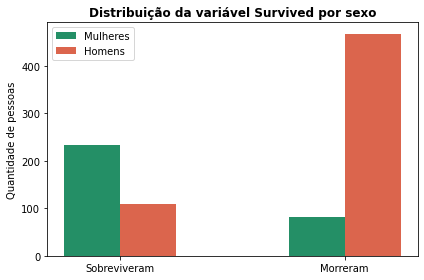

In [6]:
# configurações do gráfico com a visualização das informações acima extraídas (mortos/sobreviventes vs sexo)

labels = ['Sobreviveram', 'Morreram']
ind_m = [233, 81] # indices das barras
ind_h = [109, 468] #indices das barras

x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots()
# configurações das barras
barra1 = ax.bar(x - width/2, ind_m, width, color='#248F66', label='Mulheres')
barra2 = ax.bar(x + width/2, ind_h, width, color='#DB654D', label='Homens')

#configurações de títulos, legendas e labels do gráfico
ax.set_ylabel('Quantidade de pessoas')
ax.set_title('Distribuição da variável Survived por sexo', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_labels(barra1, padding=2)
#ax.bar_labels(barra2, padding=2)

fig.tight_layout()

plt.show()


In [7]:
#probabilidade de sobreviver geral (%):

round(df.Survived.value_counts()/df.Survived.shape[0],2)

0    0.62
1    0.38
Name: Survived, dtype: float64

In [8]:
# A: sobreviver
# B: ser homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h,2))
print("Probabilidade de sobreviver sendo mulher:", round(prob_m,2))


Probabilidade de sobreviver sendo homem: 0.19
Probabilidade de sobreviver sendo mulher: 0.74


In [9]:
# transformando a varíavel Sex em número

df.Sex = df.Sex.map({"male":0,"female":1})

In [10]:
# calculo da variância global da Survived

var_global = np.var(df.Survived)

#calculando a variância em cada categoria da Survived
var_categ = df.groupby('Sex').apply(lambda x: np.var(x.Survived))
total_categ = df.Sex.value_counts()

#Variância ponderada pelo número de observações na categoria
var_ = (total_categ[0] * var_categ[0] + total_categ[1]* var_categ[1])/ (total_categ[0] + total_categ[1])

#r quadrado
r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para Survived e Sex é:", round(r_quad*100,2))


O r-quadrado para Survived e Sex é: 29.52


**Interpretação:** O coeficiente de determinação é relativamente alto, 29% da variável Survived sendo explicada pela variável Sex. Essa interpretação é reforçada pelo gráfico anteriormente mostrado e também pelo calculo das probabilidades de sobrevivência/morte sendo homem ou mulher, em que a probabilidade de morte para homens é de 74%, enquanto para as mulheres é de apenas 19%.

In [11]:
# distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

Survived
0      0.62
1      0.38

In [12]:
# tabela de frequência com os dados observados

# Tabela de frequência absoluta 
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

# Estamos calculando os valores, considerando o total pelas linhas, ou seja, pela variável Pclass
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_pct


0         1
Sex                    
0    0.811092  0.188908
1    0.257962  0.742038

**Interpretação:** 
(male == 0 | female == 1)

81% dos passageiros do sexo masculino morreram, enquanto 74% dos passageiros do sexo feminino sobreviveram, reforçando a tese de que a variável Sex influênciou na Survived.

In [13]:
# tabela de frequência com os totais em valor absoluto

df_sex['total'] = df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

0    1  total
Sex                 
0    468  109    577
1     81  233    314

In [14]:
# tabela de frequ~encia com os dados esperados

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values 

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

0       1
0  357.74  219.26
1  194.68  119.32

In [15]:
# cálculo do chi-quadrado

# observado - esperado
desvios = (df_sex.iloc[:,:2].values - df_esp.values)
print(desvios)

desvios_ao_quadrado = desvios**2

chi_quad = sum(sum(desvios_ao_quadrado/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando 'boa' relação entre as variáveis!")

[[ 110.26 -110.26]
 [-113.68  113.68]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando 'boa' relação entre as variáveis!


In [16]:
# verificando a correlação entre as variáveis do df

df.corr()

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

    
**Ex2**: 

OBS: Estude e rode o código que deixamos em anexo ao conteúdo do curso para resolver esse exercício.

Após rodar o código em anexo, faça um círculo branco no gráfico do conteúdo em anexo, indicando os pontos $(x1, x2)$ tais que $x1^2$ + $x2^2$ $\sim$ 10. Ou seja, pares $(x1, x2)$ cujo valor da f é próximo de 10.

Considere que "próximo" neste caso significa que o valor resultante da f não pode ser maior, em módulo do que 1. Isto é $-1<f(x) - 10 < 1$, ou seja,  $9 <f(x)<11$

<br>
<div>
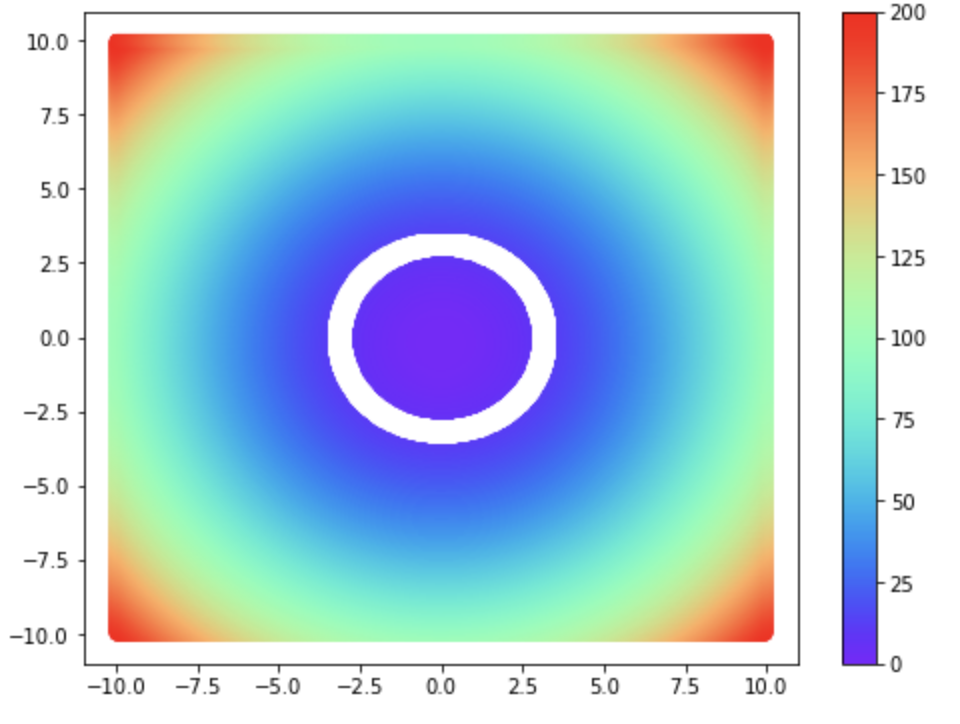
</div>

In [17]:
# função indicando os pontos de x1 e x2

def f(x1, x2):
    return x1**2 + x2**2

In [18]:
#Definindo tamanho dos vetores para o meshgrid

x1_lims = np.arange(-10,10,0.5)
x2_lims = np.arange(-10,10,0.5)

In [20]:
def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

In [21]:
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

(1600, 2)

In [26]:
#diminuindo o tamanho da malha: "vamos simular uma malha contínua"

x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

(1000000, 2)

In [31]:
# aplicando a função em todos os pontos da malha e salvando os valores na lista L
# criando listas x1 e x2 p/ receber os valores desses pontos p/ formar circulo

L = []
x1_circ = [] # valores x1 p/ circulo branco
x2_circ = [] # valores x2 p/ circulo branco
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    if (9 < value_f < 11) or (-1 < value_f - 10 < 1): # condição p/ adicionar valores de x1 e x2 em suas devidas listas 
        x1_circ.append(x1)
        x2_circ.append(x2)
    L.append(value_f)

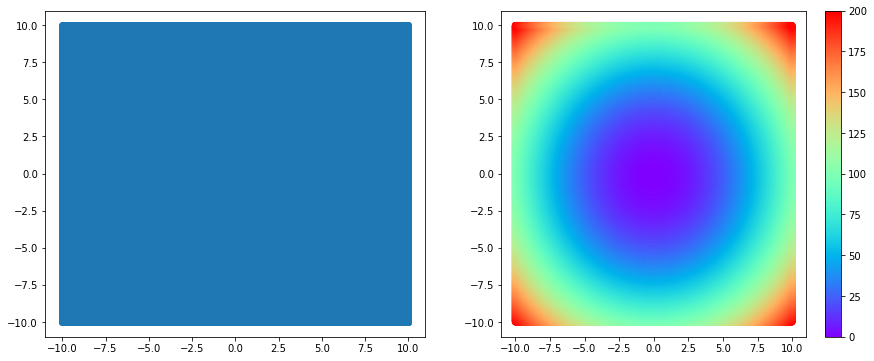

In [32]:
# simulação de malha contínua: 

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.colorbar()
plt.show()

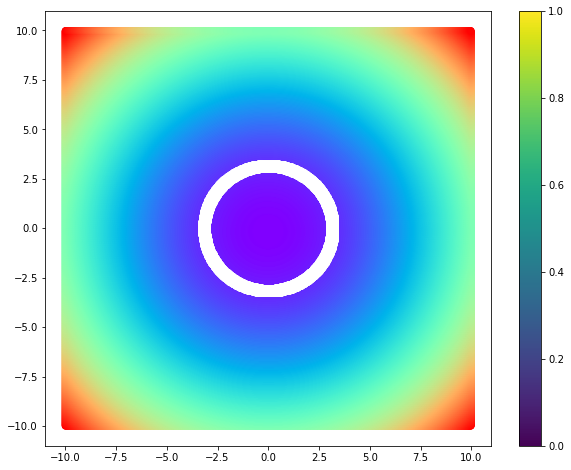

In [35]:
# plotando gráfico com a zona de decisão/circulo branco

plt.figure(figsize=[10,8])
plt.scatter(mesh[:, 0], mesh[:, 1], c=L, cmap=plt.cm.rainbow)
plt.scatter(x1_circ,x2_circ, c='white')
plt.colorbar()
plt.show()

**Ex3:** 

Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [14]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

Gestor   Canal de Origem Região  \
0                  Secretaria Nacional do Consumidor  Não identificado     SE   
1  Instituto Estadual de Proteção e Defesa do Con...  Não identificado     SE   
2                  Secretaria Nacional do Consumidor  Não identificado     SE   
3  Instituto de Promoção e Defesa do Cidadão e Co...  Não identificado     NE   
4  Secretaria de Desenvolvimento Social e Direito...  Não identificado     NE   

   UF         Cidade Sexo        Faixa Etária  Ano Abertura  Mês Abertura  \
0  RJ       Itaboraí    M  entre 31 a 40 anos          2014             6   
1  ES          Serra    F  entre 31 a 40 anos          2014             6   
2  RJ  Volta Redonda    M  entre 31 a 40 anos          2014             6   
3  MA       São Luís    F  entre 31 a 40 anos          2014             5   
4  PE         Recife    M  entre 21 a 30 anos          2014             6   

  Data Abertura  ...   Como Comprou Contratou Procurou Empresa Respondida  \
0    27/06/2014  ...  Não comprei / contratei                S          S   
1    11/06/2014  ...                 Internet                S          S   
2    27/06/2014  ...                 Internet                S          S   
3    29/05/2014  ...  Não comprei / contratei                S          S   
4    30/06/2014  ...                 Internet                S          S   

                  Situação Avaliação Reclamação Nota do Consumidor  \
0  Finalizada não avaliada         Não Avaliada                NaN   
1      Finalizada avaliada        Não Resolvida                1.0   
2      Finalizada avaliada            Resolvida                5.0   
3      Finalizada avaliada            Resolvida                5.0   
4  Finalizada não avaliada         Não Avaliada                NaN   

  Análise da Recusa Edição de Conteúdo Interação do Gestor Total  
0               NaN                  N                   N     1  
1               NaN                  N                   N     1  
2               NaN                  N                   N     1  
3               NaN                  N                   N     1  
4               NaN                  N                   N     1  

[5 rows x 38 columns]

In [20]:
# verificando o tipo das variáveis, para saber se é preciso alterar alguma 

df.dtypes

Gestor                   object
canal_origem             object
regiao                   object
UF                       object
Cidade                   object
Sexo                     object
faixa_etaria             object
ano_abertura              int64
mes_abertura              int64
data_abertura            object
hora_abertura            object
data_resposta            object
hora_resposta            object
data_analise             object
hora_analise             object
data_recusa              object
hora_recusa              object
data_finalizacao         object
hora_finalizacao         object
prazo_resposta           object
prazo_analise_gestor    float64
tempo_resposta          float64
nome_fantasia            object
segmento_mercado         object
area                     object
Assunto                  object
grupo_problema           object
Problema                 object
como_comp_contratou      object
procurou_empresa         object
Respondida               object
situacao

In [24]:
# renomenado as series do df

df.rename(columns = {'Canal de Origem':'canal_origem', 'Região':'regiao','Faixa Etária':'faixa_etaria', 'Ano Abertura':'ano_abertura',
                     'Mês Abertura':'mes_abertura', 'Data Abertura':'data_abertura','Hora Abertura':'hora_abertura', 'Data Resposta':'data_resposta',
                     'Hora Resposta':'hora_resposta', 'Data Análise':'data_analise','Hora Análise':'hora_analise', 'Data Recusa':'data_recusa',
                     'Hora Recusa':'hora_recusa', 'Data Finalização':'data_finalizacao','Hora Finalização':'hora_finalizacao', 'Prazo Resposta':'prazo_resposta',
                     'Prazo Analise Gestor':'prazo_analise_gestor','Tempo Resposta':'tempo_resposta', 'Nome Fantasia':'nome_fantasia', 'Segmento de Mercado':'segmento_mercado',
                     'Área':'area', 'Grupo Problema':'grupo_problema', 'Como Comprou Contratou':'como_comp_contratou', 'Procurou Empresa':'procurou_empresa', 'Situação':'situacao',
                     'Avaliação Reclamação':'avaliacao_reclamacao','Nota do Consumidor':'nota_consumidor', 'Análise da Recusa':'analise_recusa', 'Edição de Conteúdo':'edicao_conteudo',
                     'Interação do Gestor':'interacao_gestor','Problema':'problema','UF':'uf','Assunto':'assunto','Respondida':'respondida','Sexo':'sexo','Cidade':'cidade','Total':'total'}, inplace= True)

In [25]:
# 1 - Qual o número de reclamações por Estado?

tbl_freq_rec = pd.DataFrame(df.uf.value_counts())
tbl_freq_rec

uf
SP  11882
PR   6140
RJ   4907
MG   4186
BA   2443
RS   1941
DF   1805
PE   1626
SC   1458
MA   1082
ES   1081
CE   1068
MT   1012
GO    886
MS    531
AC    449
PB    343
AM    291
PA    211
RN    160
RO    119
AL    104
SE     97
PI     77
TO     46
RR     24
AP     18

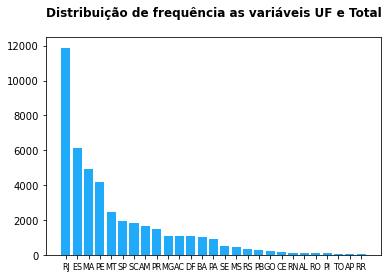

In [26]:
# configuração do gráfico com a distribuição das reclamações por estado

plt.bar(df.uf.unique(), df.uf.value_counts(), color = '#20AAFA')
plt.xticks(fontsize= 8)
plt.title('Distribuição de frequência as variáveis UF e Total\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

In [27]:
# 2 - Qual a quantidade de reclamações por sexo?

df_rec = df.groupby('sexo').apply(lambda x: x.total.value_counts()).unstack()
print(df_rec)

total  sexo
1      F       16092
       M       27895
dtype: int64


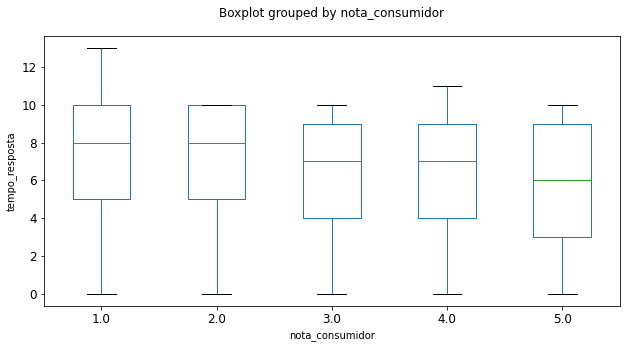

In [28]:
# 3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

df.boxplot(column= 'tempo_resposta', by ='nota_consumidor',fontsize=12,figsize=[10,5],grid = False )
plt.ylabel('tempo_resposta')
plt.title("")
plt.show()


In [29]:
df.describe()

ano_abertura  mes_abertura  prazo_analise_gestor  tempo_resposta  \
count       43987.0  43987.000000           1953.000000    41961.000000   
mean         2014.0      9.550435              4.768049        6.667572   
std             0.0      1.898572              4.395177        3.066805   
min          2014.0      5.000000              0.000000        0.000000   
25%          2014.0      8.000000              1.000000        4.000000   
50%          2014.0     10.000000              4.000000        8.000000   
75%          2014.0     11.000000              8.000000        9.000000   
max          2014.0     12.000000             15.000000       13.000000   

       nota_consumidor    total  
count     28627.000000  43987.0  
mean          3.007021      1.0  
std           1.681700      0.0  
min           1.000000      1.0  
25%           1.000000      1.0  
50%           3.000000      1.0  
75%           5.000000      1.0  
max           5.000000      1.0

In [30]:
df.corr()[['nota_consumidor']]

nota_consumidor
ano_abertura                      NaN
mes_abertura                 0.073964
prazo_analise_gestor        -0.068360
tempo_resposta              -0.187150
nota_consumidor              1.000000
total                             NaN

**Interpretação**

As variáveis Tempo_Resposta e Nota_Consumidor se correlacionam negativamente, ou seja, a medida que o tempo de resposta aumenta a nota do consumidor diminui, mas como se pode observar essa correlação que existe entre elas não é forte. 

A partir da visualização do boxplot se pode observar ainda que, considerando as medianas, a cada um dia de não atendimento a diferença entre as notas pode variar de 1 a 2 pontos negativos. 

In [31]:
# 4 - Proporção de reclamações registradas e não respondidas.

tbl_freq_resp = pd.DataFrame(df.respondida.value_counts())
tbl_freq_resp.rename(columns = {'respondida':'freq_abs_resp'}, inplace = True)
tbl_freq_resp['freq_relativa_resp'] = round(tbl_freq_resp.freq_abs_resp  /tbl_freq_resp.freq_abs_resp.sum(),2)

tbl_freq_resp

freq_abs_resp  freq_relativa_resp
S          41961                0.95
N           2026                0.05

In [66]:
# 5. Como se relacionam as notas dadas pelos consumidores com as áreas de mercado? E em uma área específica?
# E dentro dessa área específica, como estão os números de determinada empresa com relação aos valores gerais da área? 

# frequencia de reclamações por área de atuação 
tbl_freq_area = pd.DataFrame(df.area.value_counts())

tbl_freq_area

area
Telecomunicações                         19965
Serviços Financeiros                      9364
Produtos de Telefonia e Informática       7047
Produtos Eletrodomésticos e Eletrônicos   3656
Demais Produtos                           2312
Transportes                                477
Demais Serviços                            402
Saúde                                      257
Turismo/Viagens                            243
Alimentos                                  116
Água, Energia, Gás                          73
Habitação                                   71
Educação                                     4

In [46]:
# distribuição geral das notas dos consumidores 
dist_nota = pd.DataFrame(df.nota_consumidor.value_counts())

dist_nota

nota_consumidor
1.0             9904
5.0             8789
4.0             4309
3.0             3747
2.0             1878

In [59]:
# Suponhamos que a empresa em questão seja da área de telecomunicações, então poderia ser 
# observada a distribuição das notas dos consumidores apenas nessa área 
dist_area = df[(df.area=='Telecomunicações') & (df.nota_consumidor>0)].nota_consumidor.value_counts()

dist_area

1.0    4355
5.0    4265
4.0    2266
3.0    1913
2.0     906
Name: nota_consumidor, dtype: int64

In [61]:
# porcentagens das notas
n1 = (4355*100)/19965
n2 = (906*100)/19965
n3 = (1913*100)/19965
n4 = (2266*100)/19965
n5 = (4265*100)/19965

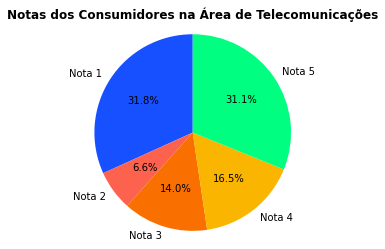

In [132]:
# conjunto de dados
labels = 'Nota 1', 'Nota 2', 'Nota 3', 'Nota 4', 'Nota 5'
sizes = [n1, n2, n3, n4, n5]

# configurações gerais do gráfico
colors = ['#1750FF','#FC624E','#FA7000','#FAB500','#00FF81']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.set_title('Notas dos Consumidores na Área de Telecomunicações', size=12,weight='bold')
ax1.axis('equal')
plt.show()

In [114]:
# comparação da distribuição das notas dos consumidores para a área de telecomunicações com a distribuição
# das notas dos consumidores com a de uma empresa específica na área de telecomunicações, verificando se a 
# empresa está fora da média das empresas da área de telecomunicações em geral. 

notas_vivo = df[(df.area=='Telecomunicações') & (df.nome_fantasia=='Vivo - Telefônica (GVT)') & (df.nota_consumidor>0)].nota_consumidor.value_counts()

notas_claro = df[(df.area=='Telecomunicações') & (df.nome_fantasia=='Claro Celular') & (df.nota_consumidor>0)].nota_consumidor.value_counts()

notas_oi = df[(df.area=='Telecomunicações') & (df.nome_fantasia=='Oi Celular') & (df.nota_consumidor>0)].nota_consumidor.value_counts()

notas_tim = df[(df.area=='Telecomunicações') & (df.nome_fantasia=='Tim') & (df.nota_consumidor>0)].nota_consumidor.value_counts()

In [115]:
#df[(df.area=='Telecomunicações')].nome_fantasia.value_counts()

  Notas dos Consumidores  Vivo - Telefônica  Claro Celular  Oi Celular  Tim
0                 Nota 1                970            211         410  815
1                 Nota 2                217             66          77  130
2                 Nota 3                439            158         170  284
3                 Nota 4                522            221         170  340
4                 Nota 5               1127            679         386  506


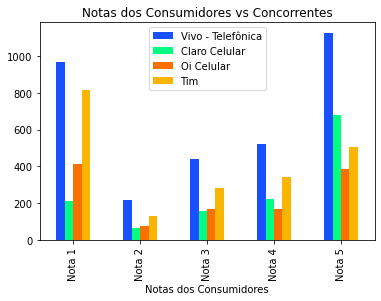

In [117]:
# gráfico relacionando as notas recebidas pela empresa e por seus principais concorrentes. 

df1 = pd.DataFrame([['Nota 1', 970, 211, 410, 815], ['Nota 2', 217, 66, 77, 130], ['Nota 3', 439, 158, 170, 284], 
                   ['Nota 4', 522, 221, 170, 340], ['Nota 5', 1127, 679, 386, 506]], 
                  columns=['Notas dos Consumidores', 'Vivo - Telefônica', 'Claro Celular', 'Oi Celular', 'Tim']) 

colors = ['#1750FF','#00FF81','#FA7000','#FAB500']

print(df1) 
df1.plot(x='Notas dos Consumidores',color=colors,kind='bar',stacked=False,title='Notas dos Consumidores vs Concorrentes')
plt.show()

#Obs.: o gráfico abaixo trás uma boa ideia da distribuição das notas dos consumidores por empresa, mas para que essa informação
# fosse de fato considerada acredito que ainda precisaria saber a proporção dessa distribuição de notas, pois as quantidades
# de reclamações por empresa são variadas. 